# Assortativity

In [2]:
import urllib
import numpy as np
import pandas as pd
import scipy.spatial as spt
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

In [6]:
url = "https://dl.dropboxusercontent.com/s/3ieuhkkhzrdpw3a/lesmis.gml?dl=1"
with urllib.request.urlopen(url) as f:
    data = f.read().decode('utf-8')
with open('lesmis.gml', 'w') as f:
    f.write(data) 

### Similarities Calculation

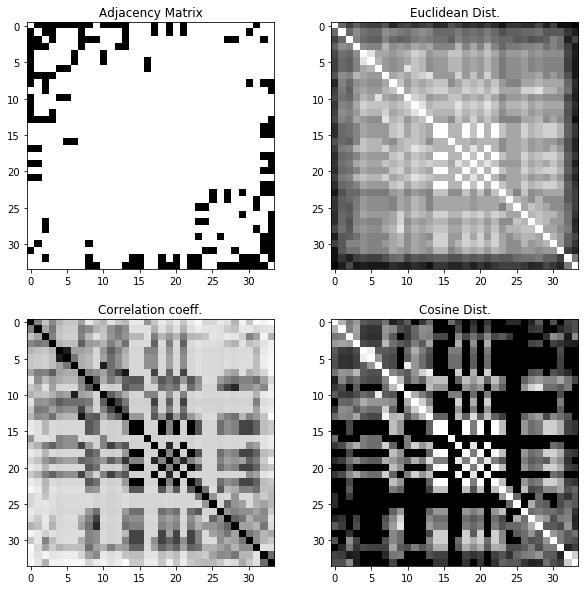

In [8]:
G = nx.karate_club_graph()
A = nx.to_numpy_matrix(G, dtype=int)
A = np.asarray(A)

def plotDist(A):
    
    f, ax = plt.subplots(2, 2, figsize=(10,10))
    ax[0, 0].imshow(A, cmap = 'Greys', interpolation = 'None')
    ax[0, 0].set_title('Adjacency Matrix')
    
    D = np.corrcoef(A)
    ax[1, 0].imshow(D, cmap = 'Greys', interpolation = 'None')
    ax[1, 0].set_title('Correlation coeff.')
    
    dVec = spt.distance.pdist(A, metric = 'euclidean')
    D = spt.distance.squareform(dVec)
    ax[0, 1].imshow(D, cmap = 'Greys', interpolation = 'None')
    ax[0, 1].set_title('Euclidean Dist.')
    
    dVec = spt.distance.pdist(A, metric = 'cosine')
    D = spt.distance.squareform(dVec)
    ax[1, 1].imshow(D, cmap = 'Greys', interpolation = 'None')
    ax[1, 1].set_title('Cosine Dist.')
    

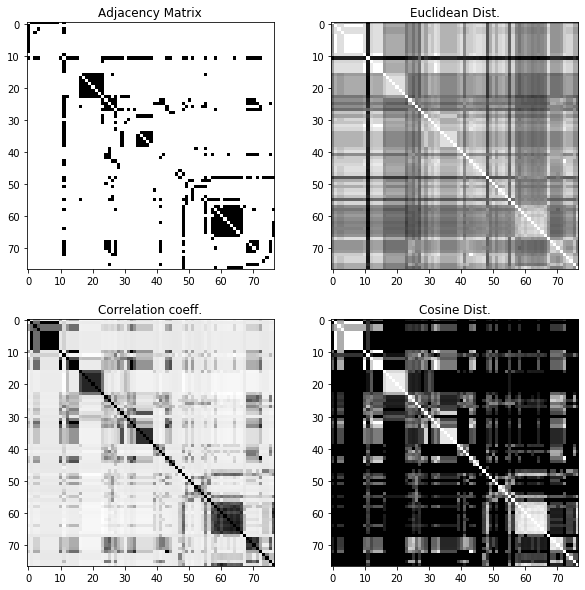

In [9]:
G = nx.read_gml('lesmis.gml')
A = nx.to_numpy_matrix(G, dtype=int)
A = np.asarray(A)

plotDist(A)

### Node Reordering

Without special preprocess procedures graph adjacency matrix can look very noisy and hide network's structure (just look at the matrices above). Offcourse usually you don't know the structure itself (communities, groups of closelly connected nodes, etc.) unless it is given, however there are some procedures of node reordering that provides a better view of the network's adjacency matrix.

*[Reverse Cuthill-McKee](http://en.wikipedia.org/wiki/Cuthill%E2%80%93McKee_algorithm)* finds permutation of the nodes that minimizes the **bandwidth** of the matrix, which is calculated as:
$$ \theta = \max_{a_{ij} > 0}|i-j|$$
Unformally, this algorithm puts some *mass* on the diagonal of adjacency matrix.

Run this reordering with *nx.utils.reverse_cuthill_mckee_ordering(G)* and compare with the results above

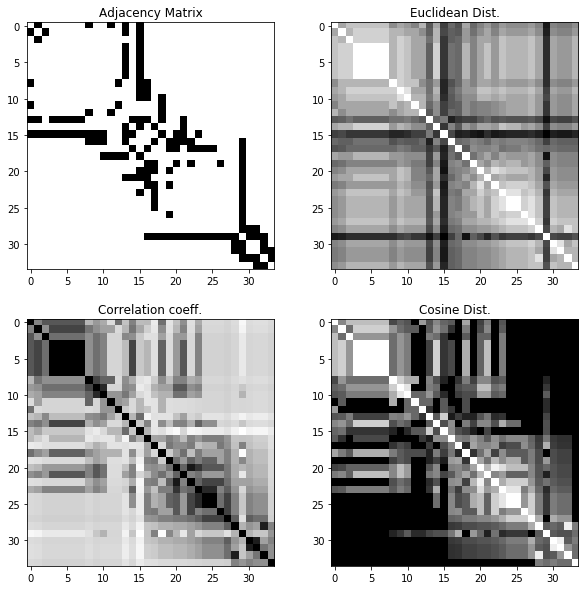

In [8]:
G = nx.karate_club_graph()

# run procedure
cm = nx.utils.reverse_cuthill_mckee_ordering(G)
# get permutation
l = [n for n in cm]
l

A = nx.to_numpy_matrix(G)
A = np.asarray(A)
# apply reordering
A = A[np.ix_(l,l)]

plotDist(A)

